In [15]:
## importing libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## getting current directory

os.getcwd()

'c:\\Users\\singh\\OneDrive\\Documents\\BITS WILP\\Sem 1\\Machine Learning (S1-25_AIMLCZG565)\\ML Assignment 2\\telco-customer-churn-ml-deployment\\notebooks'

In [3]:
## currently in notebooks folder to go to data folder using relative command
## ../ is the parent of the current directory.

os.listdir("../data")

['processed_telco.csv', 'raw_telco.csv']

In [4]:
## reading csv file

df0 = pd.read_csv("../data/raw_telco.csv")
df = df0.copy()

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [6]:
## checking Dataframe
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
## dropping irrelevant columns
df.drop(columns=['customerID'], inplace=True)

In [8]:
## checking for NULL and NA
df.isnull().sum()
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [9]:
## Conveting Object to numeric and filling NA's
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")
df['TotalCharges'].isna().sum() # 11
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\singh\AppData\Local\Temp\ipykernel_18344\1349429801.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [10]:
## Encoding Target Variable

df['Churn'] = df['Churn'].map({"Yes":1,"No":0})
df['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [11]:
## Selecting categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [12]:
## Encoding columns

df_encoded = pd.get_dummies(df,columns=categorical_cols,drop_first=True)

In [13]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,0,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,0,0,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,0,0,1,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,3,0,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,0,0,1,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [14]:
## Saving processed dataset

df_encoded.to_csv("../data/processed_telco.csv",index=False)

### Customer churn means the percentage of customers who stop using a company's product or service over a specific period, indicating lost customers or subscribers, often measured as a rate to understand customer loyalty and retention. High churn signals dissatisfaction or poor product fit, while low churn shows strong customer satisfaction and healthy growth, especially vital for subscription businesses

## EDA (Exploratory Data Analysis)

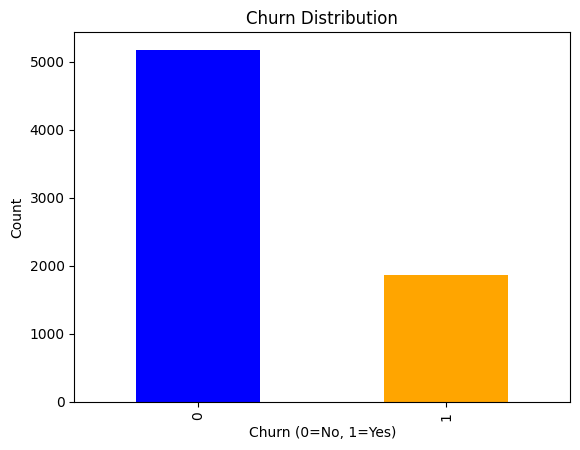

In [ ]:
plt.figure()
df_encoded['Churn'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn Distribution')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


### Observations
##### As Non-Churn customers are more compared to Churn customers, we will have to use evaluation metrics other than accuracy

<Figure size 640x480 with 0 Axes>

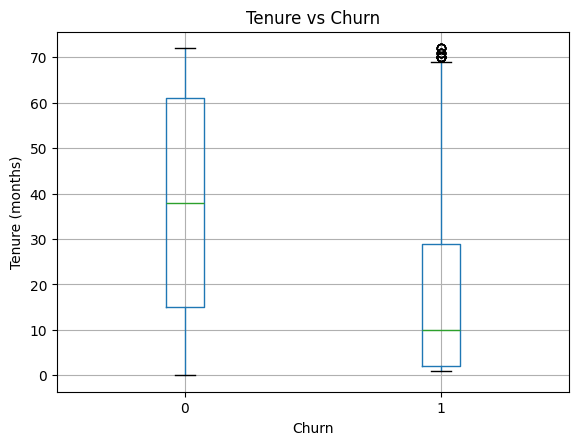

In [24]:
## Churn VS Tenure

plt.figure()
df_encoded.boxplot(column="tenure", by="Churn")
plt.title("Tenure vs Churn")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("Tenure (months)")
plt.show()


##### Observations: Customers who churn tend to have significantly lower tenure, indicating early-stage customers are more likely to leave.

<Figure size 640x480 with 0 Axes>

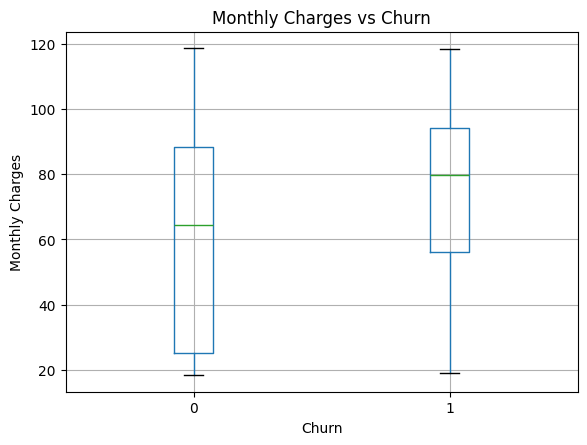

In [25]:
plt.figure()
df_encoded.boxplot(column="MonthlyCharges", by="Churn")
plt.title("Monthly Charges vs Churn")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


##### Observations: Churned customers generally have higher monthly charges, suggesting pricing sensitivity plays a role in churn behavior.

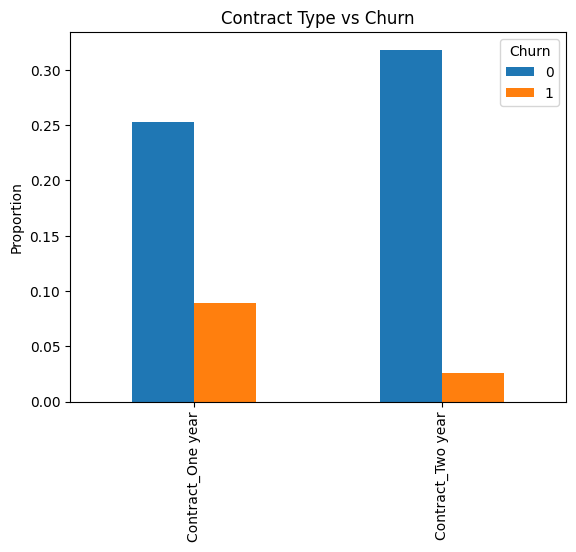

In [26]:
contract_cols = [
    col for col in df_encoded.columns if "Contract_" in col
]

churn_contract = df_encoded.groupby("Churn")[contract_cols].mean()

churn_contract.T.plot(kind="bar")
plt.title("Contract Type vs Churn")
plt.ylabel("Proportion")
plt.show()


##### Observations: Customers on month-to-month contracts show higher churn compared to long-term contracts, indicating contract duration is a strong churn predictor.

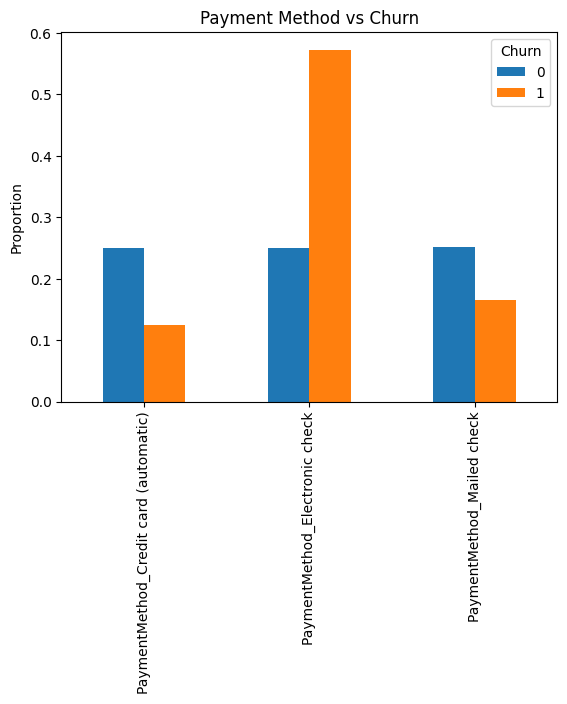

In [28]:
payment_cols = [
    col for col in df_encoded.columns if "PaymentMethod_" in col
]

df_encoded.groupby("Churn")[payment_cols].mean().T.plot(kind="bar")
plt.title("Payment Method vs Churn")
plt.ylabel("Proportion")
plt.show()


##### Observations: Certain payment methods, such as electronic check, show higher churn rates compared to automatic payment methods.

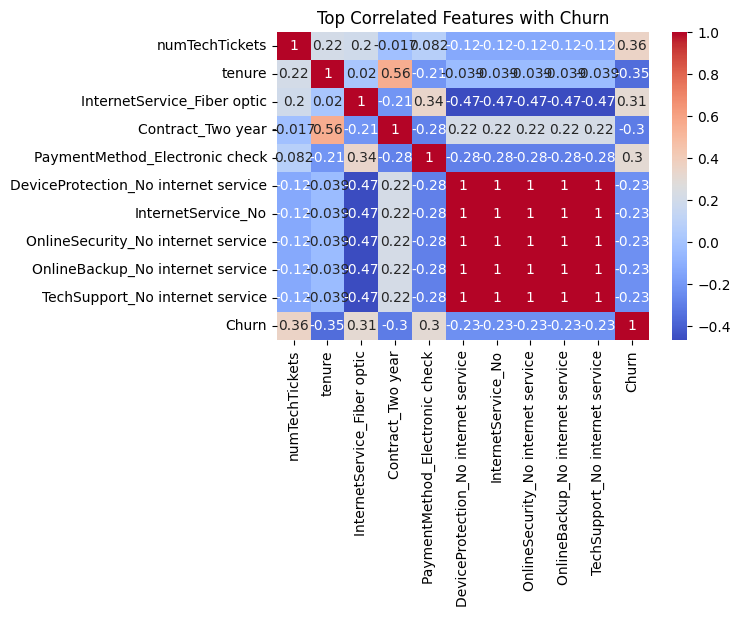

In [ ]:
corr = df_encoded.corr()

top_corr = corr["Churn"].abs().sort_values(ascending=False)[1:11]

plt.figure(figsize=(6,4))
sns.heatmap(
    df_encoded[top_corr.index.tolist() + ["Churn"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Top   Features with Churn")
plt.show()


##### Observations: The correlation heatmap shows that churn is most strongly influenced by tenure, contract duration, number of technical support tickets, monthly charges, and payment method, indicating that customer longevity, service quality, and pricing factors play a key role in churn behavior.